# Studio del dataset

In [18]:
# lettura del file rawdata.csv in un dataframe pandas

import pandas as pd
import matplotlib.pyplot as plt

# lettura del file csv
df = pd.read_csv('rawdata.csv')



/tmp/ipykernel_3879/3695618065.py:7: DtypeWarning: Columns (0,11,12,14,19,25,27,30,31,33,34,37,38,39,40,100,122,160,166,167,168,169,170,278) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('rawdata.csv')


In [19]:
#show only the second row from dataset
df.iloc[0]
#remove the second row from the dataframe

#create new dataframe without the second row
df2 = df.drop(df.index[0])
#show the new dataframe
df2




,Variable,Newpatient,Investigationalsite,Typeofthehealthcareinfrastructure,Dateofrecordcreation,Typeofcase,Dateofinclusion,Dateofbirth,Age,Gender,...,AE_fuADD,sistAE_fuADD,localAE_fuADD,OUTCOME,DateofOutcome,TypeofOutcome,timetooutcome,DateofOutcome_updated,TypeofOutcome_updated,timetooutcome_updated
1,NaN,IT-0111-005876,IT-0111,Medicalized Nursing-home (RSA Medicalizzata),12-mag-2021,Partly retrospective and prospectively continu...,10-feb-2021,01-feb-1947 0:00,74.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,IT-0165-005573,IT-0165,Retirement Home (Casa di Riposo),24-apr-2021,Retrospectively observed case,20-gen-2021,01-ago-1935 0:00,85.0,2.0,...,NaN,NaN,NaN,NaN,27-apr-21,No Major Change,13,NaN,NaN,NaN
3,NaN,IT-0110-006618,IT-0110,Nursing-Home (RSA Anziani),31-mag-2021,Partly retrospective and prospectively continu...,31-mag-2021,01-mag-1938 0:00,83.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,IT-0110-006619,IT-0110,Nursing-Home (RSA Anziani),31-mag-2021,Partly retrospective and prospectively continu...,31-mag-2021,01-ott-1944 0:00,76.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,IT-0110-006620,IT-0110,Nursing-Home (RSA Anziani),31-mag-2021,Partly retrospective and prospectively continu...,31-mag-2021,01-giu-1934 0:00,86.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,NaN,IT-0111-006069,IT-0111,Medicalized Nursing-home (RSA Medicalizzata),21-mag-2021,New prospective case,09-feb-2021,01-nov-1946 0:00,74.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3272,NaN,IT-0111-006274,IT-0111,Medicalized Nursing-home (RSA Medicalizzata),26-mag-2021,New prospective case,09-feb-2021,01-giu-1938 0:00,82.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3273,NaN,IT-0111-006352,IT-0111,Medicalized Nursing-home (RSA Medicalizzata),28-mag-2021,New prospective case,09-feb-2021,01-apr-1941 0:00,80.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3274,NaN,IT-0150-006032,IT-0150,Assisted Living (Casa Protetta),20-mag-2021,Partly retrospective and prospectively continu...,15-apr-2021,01-gen-1918 0:00,103.0,2.0,...,"1,00","1,00","0,00",NaN,NaN,NaN,NaN,05-lug-2021,Death,173.0


In [31]:
#show some statistics about each column, like the number of distinct values, the number of missing values
#df2.describe()
#write in two different lists the different types of data for columns mobcat and PA3mcat

#print the type of data of column mobcat
print(df2['mobcat'].dtypes)
'''
#convert the type float64 of column mobcat to int
df2['mobcat'] = df2['mobcat'].astype(int)
#show the new type of data of column mobcat
print(df2['mobcat'].dtypes)

#show unique values of column mobcat
print(df2['mobcat'].unique())

#show type of data of column PA3mcat
print(df2['PA3mcat'].dtypes)

#convert the type object of column PA3mcat to int
df2['PA3mcat'] = df2['PA3mcat'].astype(int)
#show the new type of data of column PA3mcat
print(df2['PA3mcat'].dtypes)

#show unique values of column PA3mcat
print(df2['PA3mcat'].unique())
'''
print(df2['PA3mcat'].value_counts())

print(df2['mobcat'].value_counts())


int64
4    1731
2     480
0     472
9     298
1     294
Name: PA3mcat, dtype: int64
1    754
0    681
3    655
2    460
9    292
4    217
5    216
Name: mobcat, dtype: int64


<Axes: >

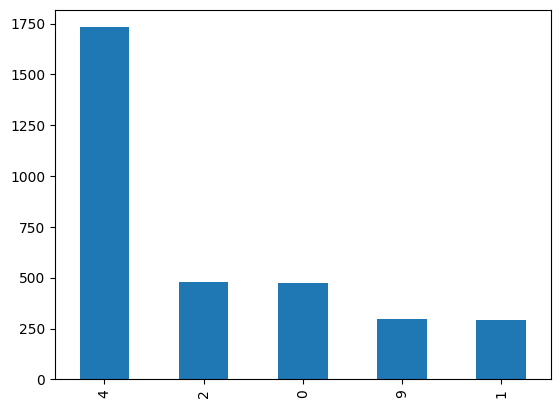

In [32]:
df2['PA3mcat'].value_counts().plot(kind='bar')

In [33]:
df2

,Variable,Newpatient,Investigationalsite,Typeofthehealthcareinfrastructure,Dateofrecordcreation,Typeofcase,Dateofinclusion,Dateofbirth,Age,Gender,...,AE_fuADD,sistAE_fuADD,localAE_fuADD,OUTCOME,DateofOutcome,TypeofOutcome,timetooutcome,DateofOutcome_updated,TypeofOutcome_updated,timetooutcome_updated
1,NaN,IT-0111-005876,IT-0111,Medicalized Nursing-home (RSA Medicalizzata),12-mag-2021,Partly retrospective and prospectively continu...,10-feb-2021,01-feb-1947 0:00,74.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,IT-0165-005573,IT-0165,Retirement Home (Casa di Riposo),24-apr-2021,Retrospectively observed case,20-gen-2021,01-ago-1935 0:00,85.0,2.0,...,NaN,NaN,NaN,NaN,27-apr-21,No Major Change,13,NaN,NaN,NaN
3,NaN,IT-0110-006618,IT-0110,Nursing-Home (RSA Anziani),31-mag-2021,Partly retrospective and prospectively continu...,31-mag-2021,01-mag-1938 0:00,83.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,IT-0110-006619,IT-0110,Nursing-Home (RSA Anziani),31-mag-2021,Partly retrospective and prospectively continu...,31-mag-2021,01-ott-1944 0:00,76.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,IT-0110-006620,IT-0110,Nursing-Home (RSA Anziani),31-mag-2021,Partly retrospective and prospectively continu...,31-mag-2021,01-giu-1934 0:00,86.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,NaN,IT-0111-006069,IT-0111,Medicalized Nursing-home (RSA Medicalizzata),21-mag-2021,New prospective case,09-feb-2021,01-nov-1946 0:00,74.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3272,NaN,IT-0111-006274,IT-0111,Medicalized Nursing-home (RSA Medicalizzata),26-mag-2021,New prospective case,09-feb-2021,01-giu-1938 0:00,82.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3273,NaN,IT-0111-006352,IT-0111,Medicalized Nursing-home (RSA Medicalizzata),28-mag-2021,New prospective case,09-feb-2021,01-apr-1941 0:00,80.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3274,NaN,IT-0150-006032,IT-0150,Assisted Living (Casa Protetta),20-mag-2021,Partly retrospective and prospectively continu...,15-apr-2021,01-gen-1918 0:00,103.0,2.0,...,"1,00","1,00","0,00",NaN,NaN,NaN,NaN,05-lug-2021,Death,173.0
